In [9]:
import yaml
import glob
import numpy as np
import pickle
import pandas as pd


In [10]:
LABEL = 'taken'
FEATURES_TO_DISCRETIZE = ['to_user_distance','to_user_elevation','total_earning','to_user_elevation']
DISCRETE_FEATURES = ['day_of_week']


In [11]:
df = pd.read_csv('../dataset/raw_dataset.csv')


In [12]:
df['day_of_week'] = pd.to_datetime(df['created_at']).apply(lambda x: '{dayofweek}'.format(dayofweek=x.dayofweek)).astype(str)


In [13]:
quantiles = [0, .5, .75, .9, 1.]

#discrete features
discretized_dataset = df[DISCRETE_FEATURES].astype(str)

#get quantiles for each column
for feature in FEATURES_TO_DISCRETIZE:
    discretized_dataset[feature] = pd.qcut(df[feature], q=quantiles, labels=range(1,len(quantiles)))

#one-hot encoding
discretized_dataset = pd.get_dummies(discretized_dataset)

discretized_dataset[LABEL] = pd.to_numeric(df[LABEL])

#print result
discretized_dataset

,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,to_user_distance_1,to_user_distance_2,to_user_distance_3,to_user_distance_4,to_user_elevation_1,to_user_elevation_2,to_user_elevation_3,to_user_elevation_4,total_earning_1,total_earning_2,total_earning_3,total_earning_4,taken
0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
8,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [14]:
discretized_dataset.to_pickle('../dataset/quantiles_discretized_dataset')

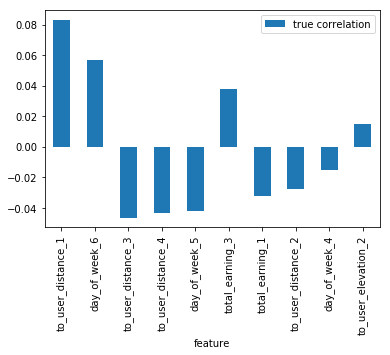

In [15]:
# Features correlation coefficent to label
fi = pd.DataFrame({'feature': list(discretized_dataset),
                   'correlation': discretized_dataset.corr()[LABEL].abs(),
                   'true correlation': discretized_dataset.corr()[LABEL]}).\
                    sort_values('correlation', ascending = False)

fi[fi.feature!=LABEL].head(10).plot.bar(x='feature', y ='true correlation')